# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [274]:
# Libraries
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

## Challenge 1

#### The data we will use in this challenge is:

In [275]:
x = np.arange(0,100)
y = x*2
z = x**2


#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

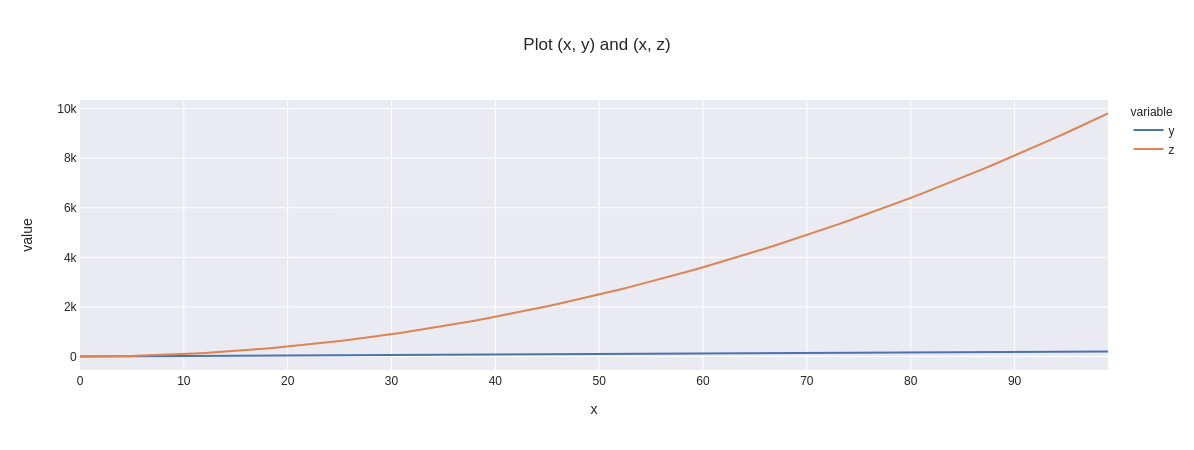

In [276]:
# Method 1
#the two plots in the same figure.
colnames = ['x', 'y', 'z']
df=pd.DataFrame({'x': x, 'y': y, 'z': z},columns=colnames)


px.line(df, x='x', y=['y','z'],title='Plot (x, y) and (x, z)',template='seaborn')



#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

In [277]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

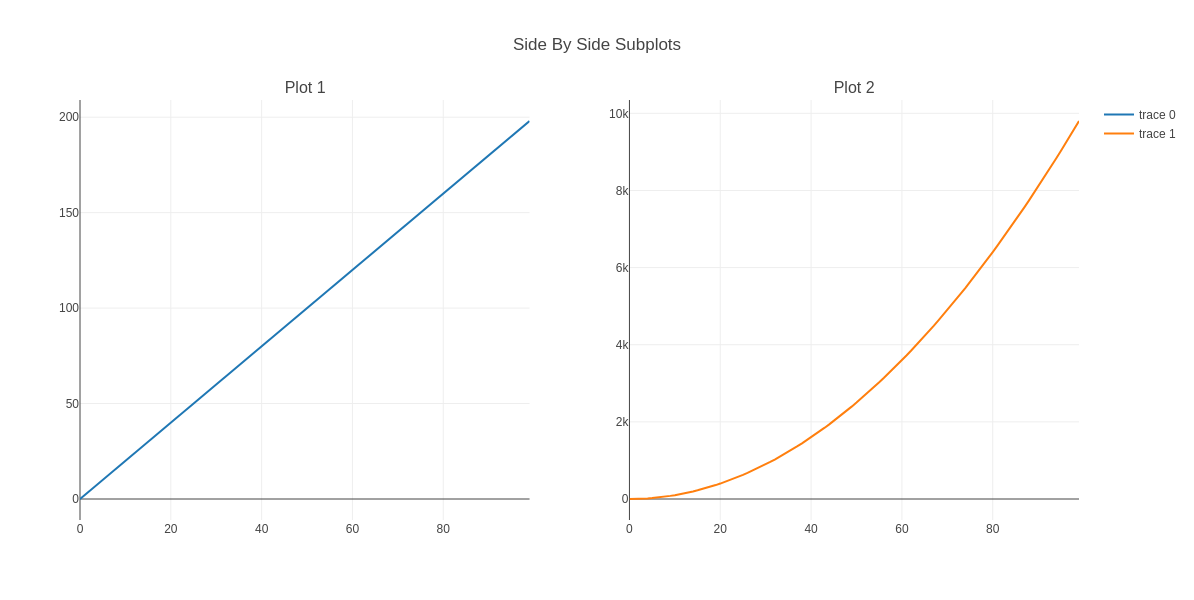

In [278]:
# Method 2
x_list=list(x)
y_list=list(y)
z_list=list(z)

fig = make_subplots(rows=1, cols=2,subplot_titles=("Plot 1", "Plot 2"))

fig.add_trace(go.Scatter(x=x_list, y=y_list),row=1, col=1)

fig.add_trace(go.Scatter(x=x_list, y=z_list),row=1, col=2)

fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
fig.show()




#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

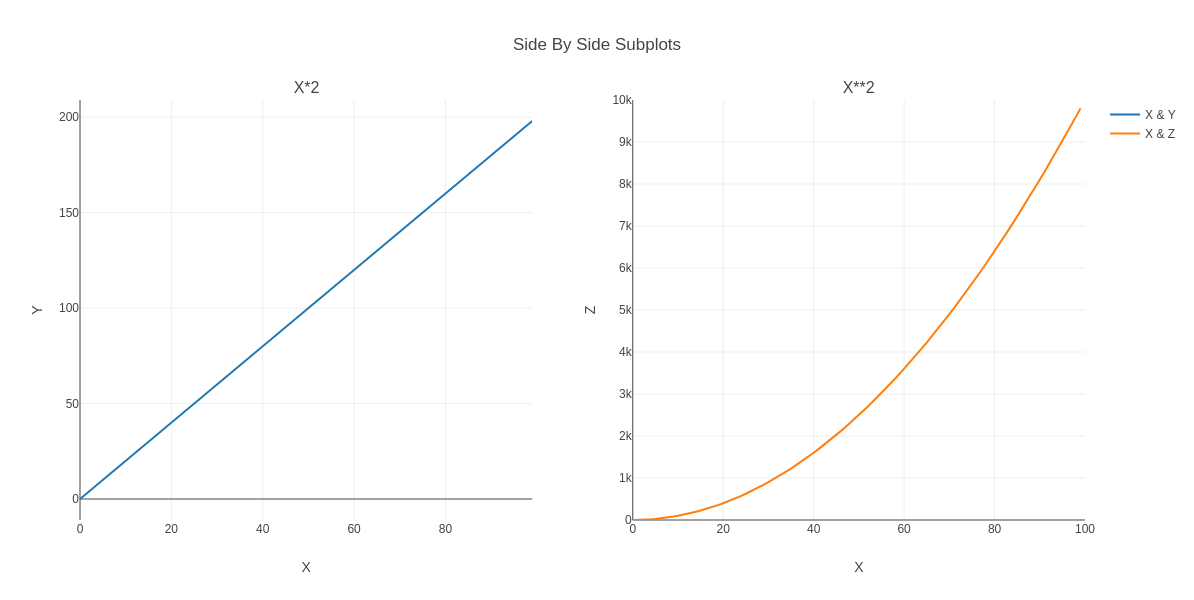

In [279]:
# your code here
fig = make_subplots(rows=1, cols=2,subplot_titles=("X*2", "X**2"))

fig.add_trace(go.Scatter(x=x_list, y=y_list, name="X & Y"),row=1, col=1)

fig.add_trace(go.Scatter(x=x_list, y=z_list, name="X & Z"),row=1, col=2)

fig.update_xaxes(title_text="X",row=1, col=1)
fig.update_xaxes(title_text="X", range=[0, 100], row=1, col=2)
fig.update_yaxes(title_text="Y", row=1, col=1)
fig.update_yaxes(title_text="Z", range=[0, 10000], row=1, col=2)


fig.update_layout(height=600, width=1000, title_text="Side By Side Subplots")
fig.show()



#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

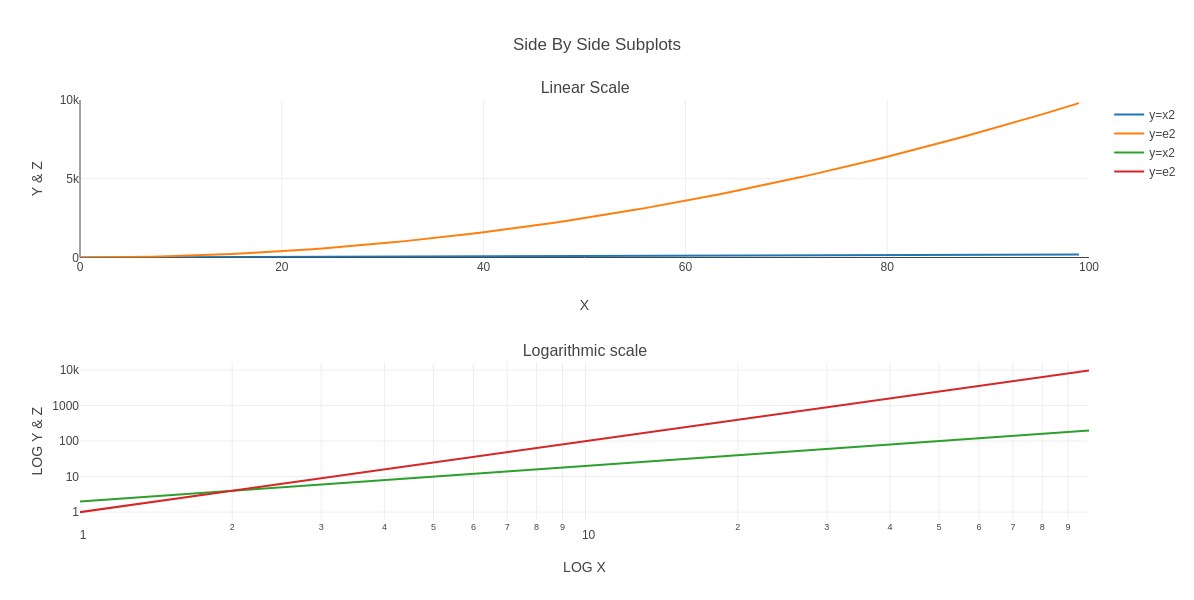

In [280]:
# your code here
fig = make_subplots(rows=2, cols=1,subplot_titles=("Linear Scale", 'Logarithmic scale'))

fig.add_trace(go.Scatter(x=x_list, y=y_list, name="y=x2"),row=1, col=1)
fig.add_trace(go.Scatter(x=x_list, y=z_list, name="y=e2"),row=1, col=1)

fig.update_xaxes(title_text="X", range=[0, 100],row=1, col=1)
fig.update_yaxes(title_text="Y & Z", range=[0, 10000], row=1, col=1)

fig.add_trace(go.Scatter(x=x_list, y=y_list, name="y=x2"),row=2, col=1)
fig.add_trace(go.Scatter(x=x_list, y=z_list, name="y=e2"),row=2, col=1)

fig.update_xaxes(title_text="LOG X",type="log", row=2, col=1)
fig.update_yaxes(title_text="LOG Y & Z",type="log", row=2, col=1)

fig.update_layout(height=600, width=1000, title_text="Side By Side Subplots")
fig.show()







#### As a bonus challenge, try to add a legend to the plot.

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [281]:
# your code here
import pandas as pd
df=pd.read_csv('../fitbit2.csv', low_memory=False)

df_average_steps=df[['Months_encoded','Steps']].groupby('Months_encoded',as_index=False).mean()
df_average_work_or_weekend=df[['Work_or_Weekend','Steps']].groupby('Work_or_Weekend',as_index=False).mean()
df_average_work_or_weekend['Work_or_Weekend'] = np.where(df_average_work_or_weekend['Work_or_Weekend']==1,'Work','Weekend')


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [282]:
df_average_steps

,Months_encoded,Steps
0,1,9892.064516
1,2,8922.866667
2,3,10312.935484
3,4,13079.033333
4,5,10620.096774
5,6,12536.166667
6,7,9193.322581
7,8,11584.774194
8,9,9191.333333
9,10,8272.451613


In [283]:
df_average_work_or_weekend

,Work_or_Weekend,Steps
0,Weekend,10064.238095
1,Work,10144.572519


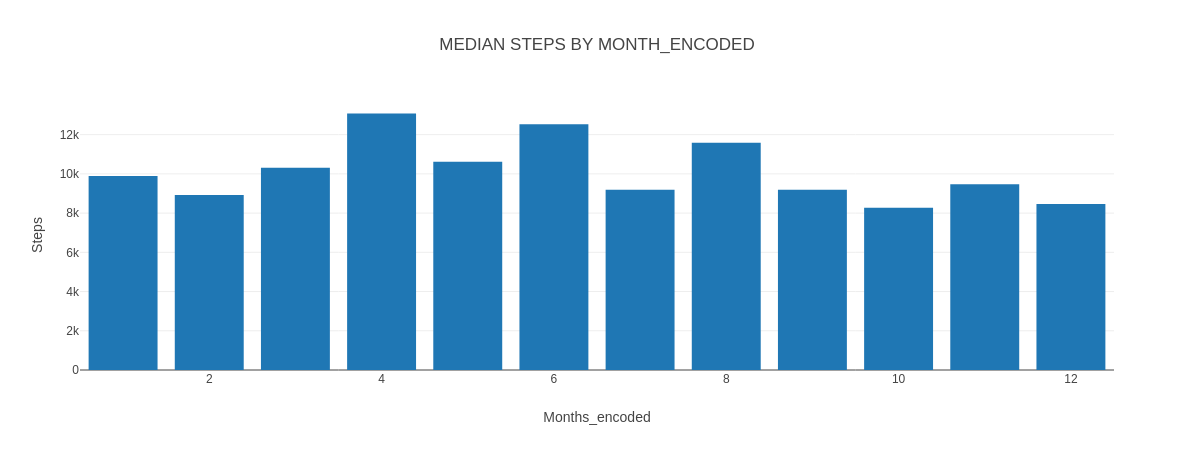

In [284]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here

px.bar(df_average_steps, x='Months_encoded', y='Steps',
       barmode="group",orientation='v',title='MEDIAN STEPS BY MONTH_ENCODED')



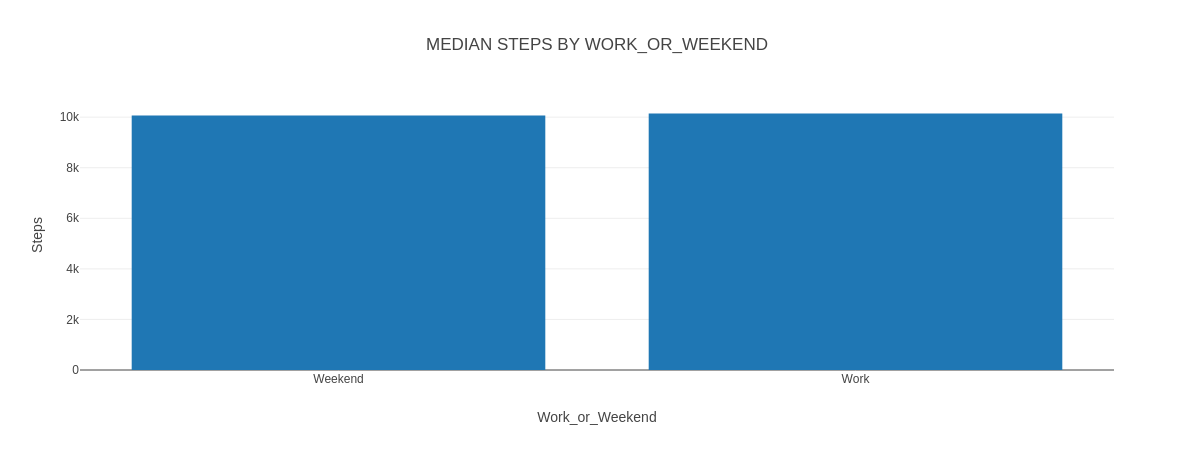

In [285]:
# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here

px.bar(df_average_work_or_weekend, x='Work_or_Weekend', y='Steps',
       barmode="group",orientation='v',title='MEDIAN STEPS BY WORK_OR_WEEKEND')



#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

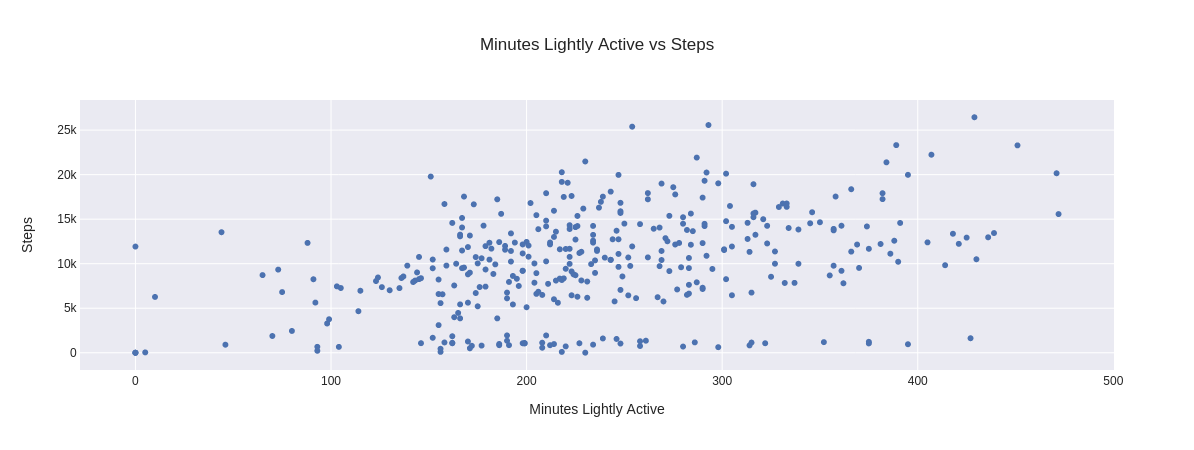

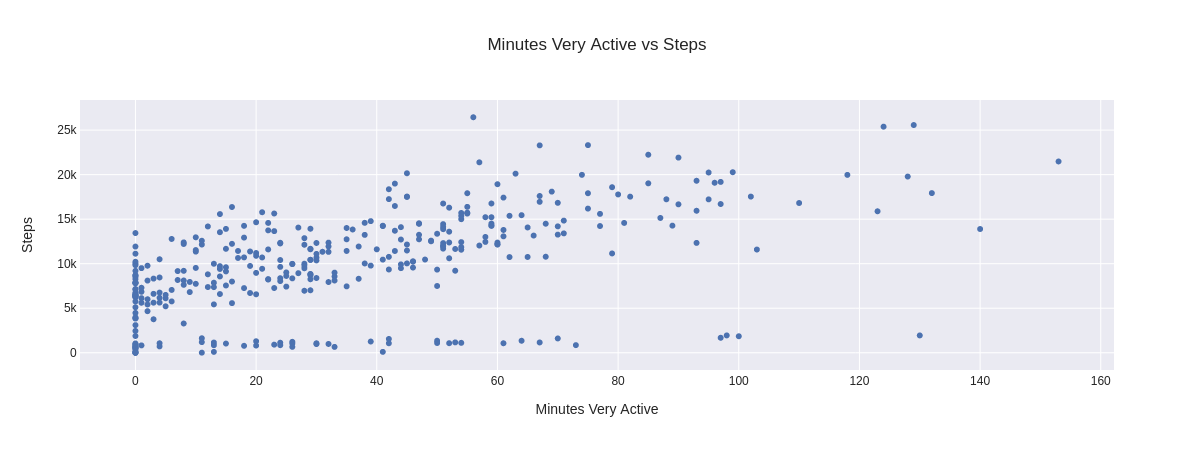

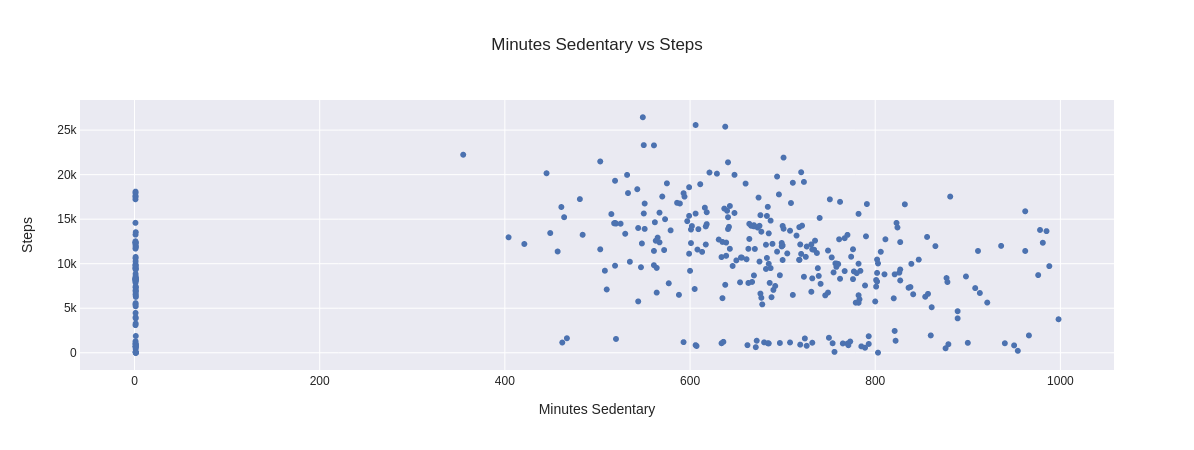

In [286]:
# your code here
columns=['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']



for x in columns:
    fig=px.scatter(df, x=x, y='Steps', template='seaborn',title=f'{x} vs Steps') 
    fig.show()    


## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [303]:
# your code here
dft=pd.read_csv('../titanic.csv', low_memory=False)
dft

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [304]:
# your code here
dft.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [305]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [306]:
# NUMERICAL VARIABLES
# your code here
dft.select_dtypes(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [307]:
# CATEGORICAL VARIABLES
# your code here
dft.select_dtypes(include='object')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

#### Use the right visulalization to show the distribution of column `Age`.

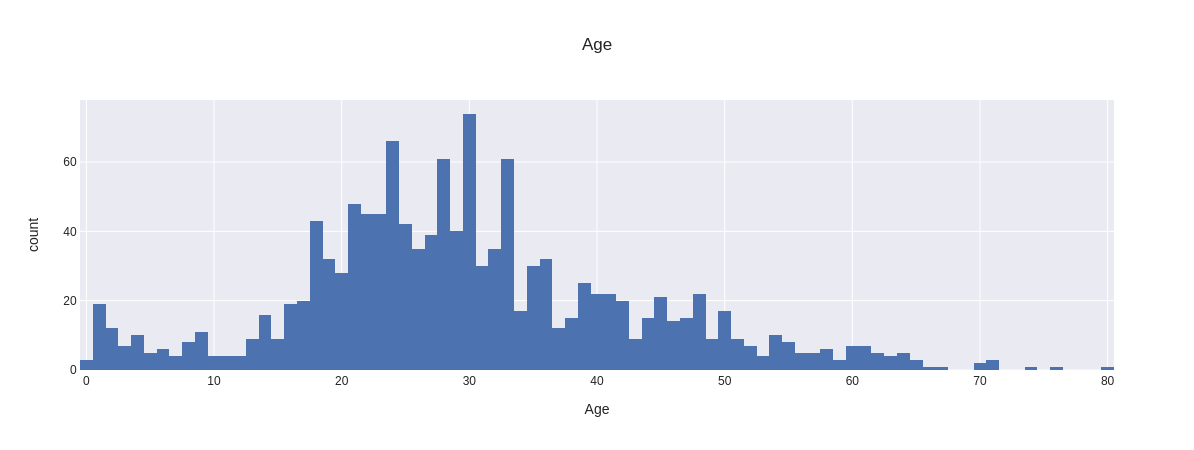

In [308]:
# your code here

fig=px.histogram(dft, x='Age',nbins=100, template='seaborn',title='Age') 
fig.show()  


#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

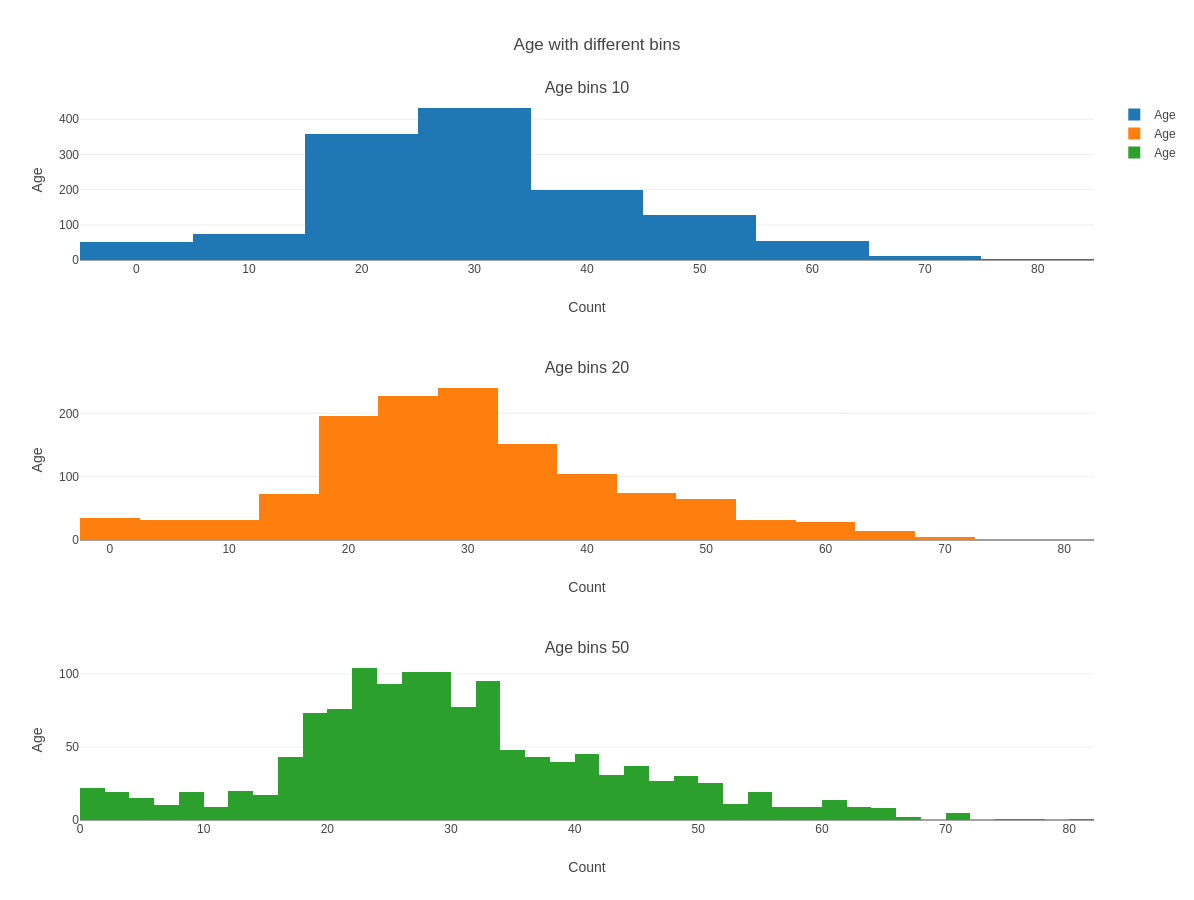

In [309]:
# your code here

fig = make_subplots(rows=3, cols=1,subplot_titles=("Age bins 10", 'Age bins 20','Age bins 50'))

fig.add_trace(go.Histogram(x=dft['Age'] , nbinsx=10,name="Age"),row=1, col=1)

fig.update_xaxes(title_text="Count",row=1, col=1)
fig.update_yaxes(title_text="Age", row=1, col=1)

fig.add_trace(go.Histogram(x=dft['Age'] , nbinsx=20,name="Age"),row=2, col=1)

fig.update_xaxes(title_text="Count",row=2, col=1)
fig.update_yaxes(title_text="Age", row=2, col=1)

fig.add_trace(go.Histogram(x=dft['Age'] , nbinsx=50,name="Age"),row=3, col=1)

fig.update_xaxes(title_text="Count",row=3, col=1)
fig.update_yaxes(title_text="Age", row=3, col=1)

fig.update_layout(height=900, width=1100, title_text="Age with different bins")
fig.show()





#### How does the bin size affect your plot?

In [310]:
"""
your comments here

the bins group the distribution according to intervals if the intervals are greater or bins lower, precision is lost.

"""

'\nyour comments here\n\nthe bins group the distribution according to intervals if the intervals are greater or bins lower, precision is lost.\n\n'

#### Use seaborn to show the distribution of column `Age`.

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

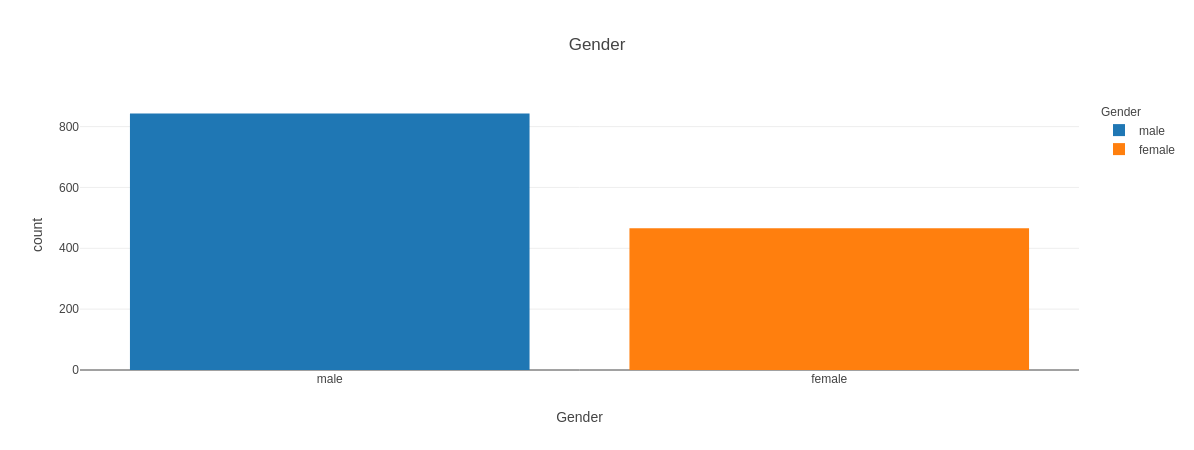

In [311]:
# Method 1 - matplotlib
# your code here

px.histogram(dft, x='Gender',color='Gender',
       orientation='v',title='Gender')


#### Use the right plot to visualize the column `Pclass`.

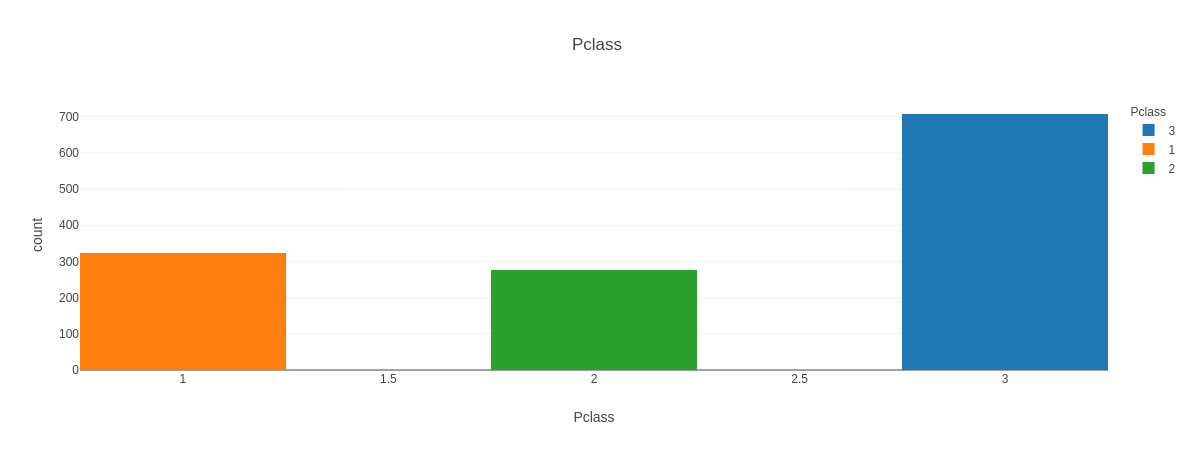

In [312]:
# your code here

px.histogram(dft, x='Pclass',color='Pclass',barmode='relative', nbins=6,
       orientation='v',title='Pclass')

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

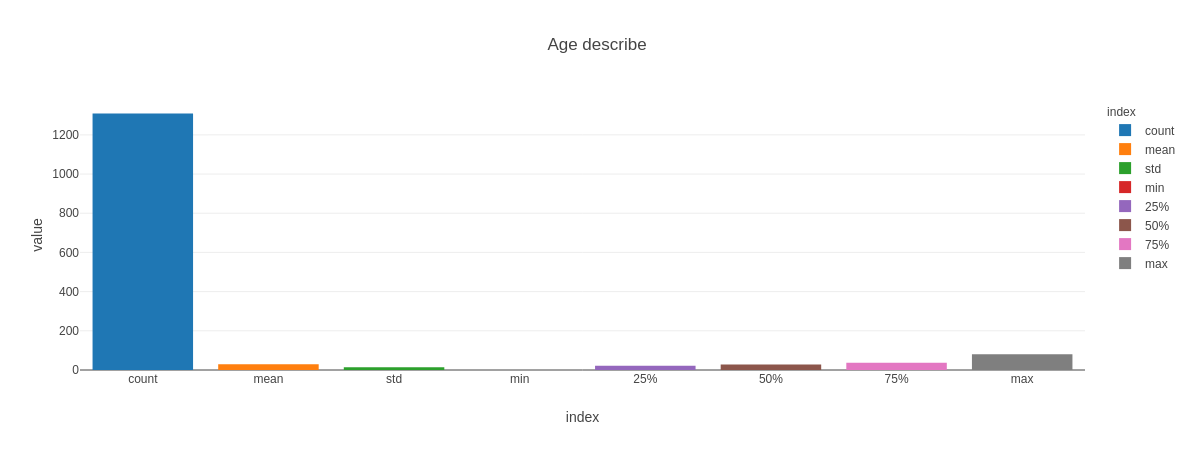

In [313]:
# your code here
# I delete the describe count for get a better plot.

dftd=dft['Age'].describe()

px.bar(dftd,color=dftd.index,orientation='v',title='Age describe')



#### What does the last plot tell you about the feature `Age`?

In [314]:
"""
your comments here
"""
#Tells than the mean is like the 75%, besides you have a lot of people in the thirties.

'\nyour comments here\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

#### What additional information does the last plot provide about feature `Age`?

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

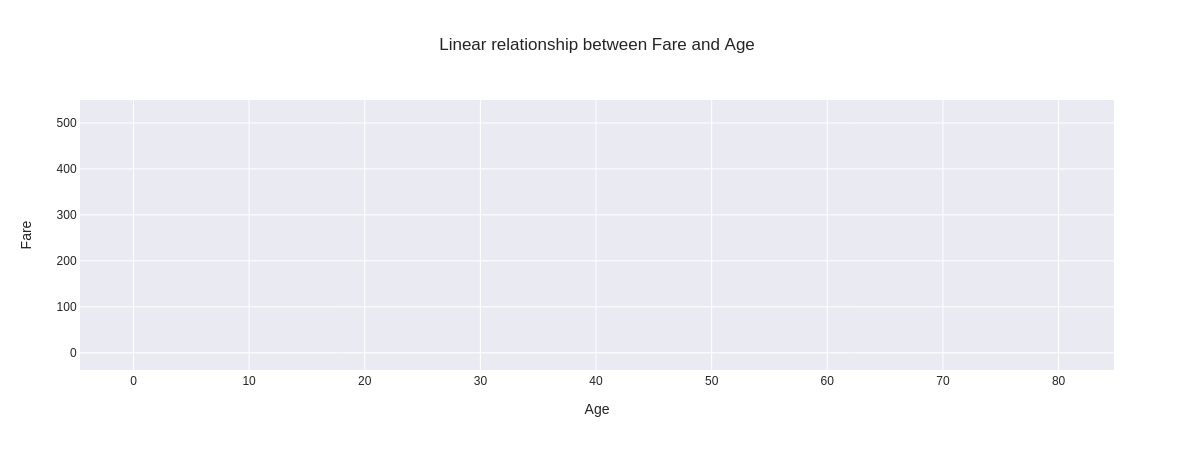

In [315]:
# Method 1 - matplotlib
# your code here

px.scatter(dft, x='Age', y='Fare', template='seaborn',title='Linear relationship between Fare and Age') 






#### Plot the correlation matrix using seaborn.

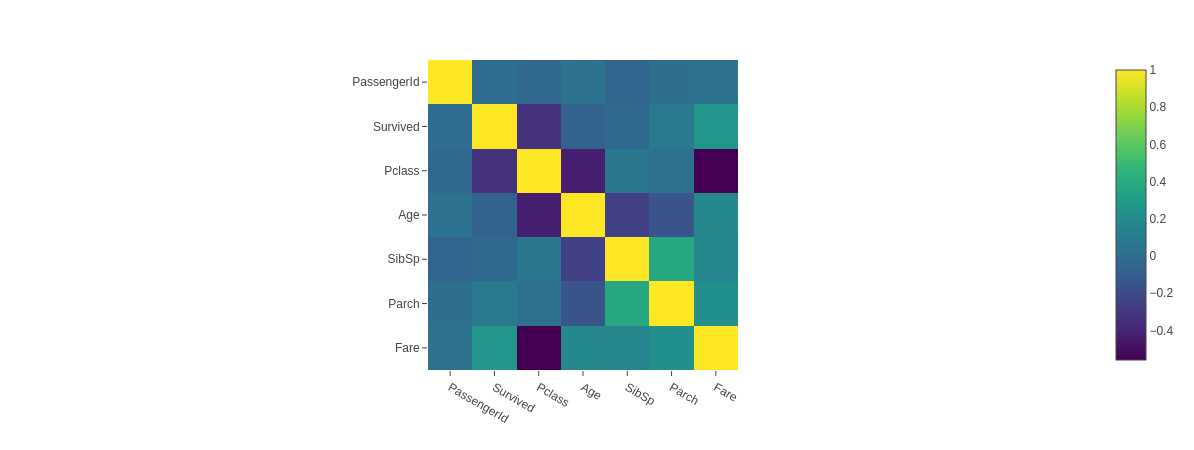

In [316]:
px.imshow(dft.corr(),x=dft.corr().columns,y=dft.corr().columns)

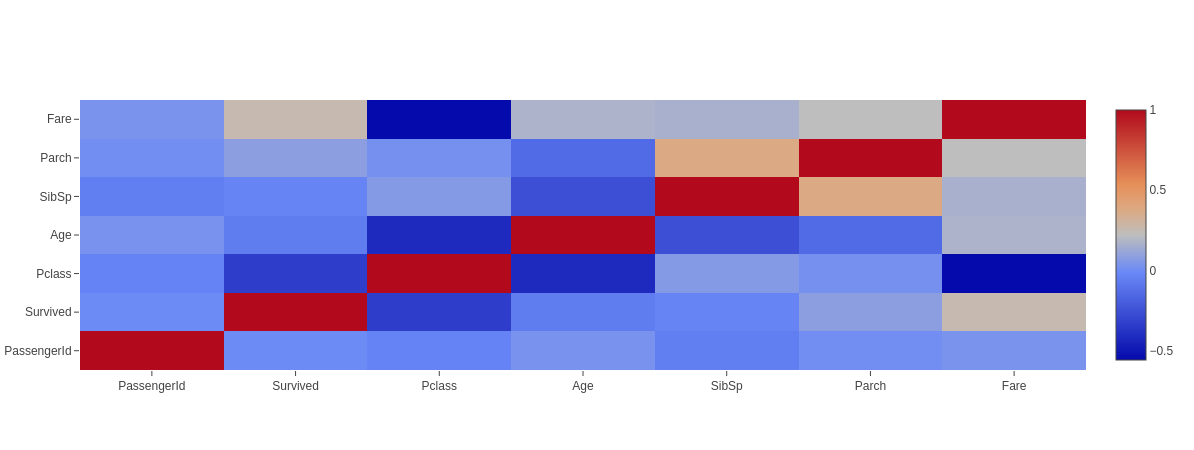

In [317]:

fig = go.Figure(data=go.Heatmap(z=dft.corr(),
                   x=dft.corr().columns,
                   y=dft.corr().columns))
fig.show()

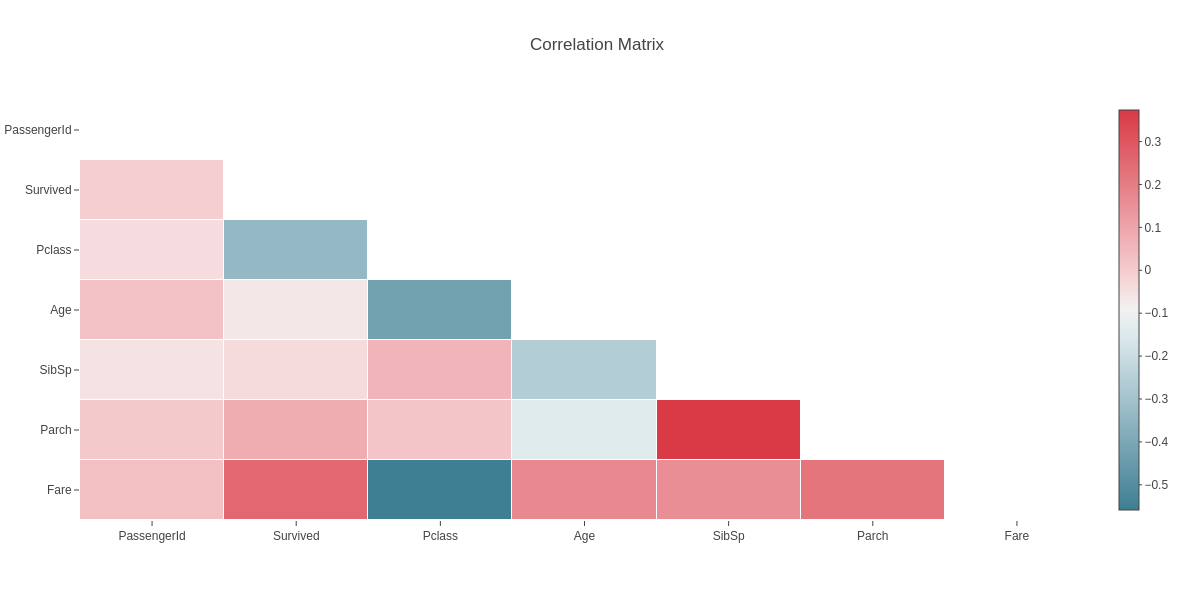

In [318]:
N = len(dft.corr().columns)

corr = [[list(dft.corr().values)[i][j] if i>j else None for j in range(N)] for i in range (N)]

sns_colorscale = [[0.0, '#3f7f93'],[0.071, '#5890a1'],[0.143, '#72a1b0'],[0.214, '#8cb3bf'],[0.286, '#a7c5cf'],[0.357, '#c0d6dd'],[0.429, '#dae8ec'],[0.5, '#f2f2f2'],[0.571, '#f7d7d9'],[0.643, '#f2bcc0'],[0.714, '#eda3a9'],[0.786, '#e8888f'],[0.857, '#e36e76'],[0.929, '#de535e'],[1.0, '#d93a46']]

heat = go.Heatmap(z=corr, x=dft.corr().columns, y=dft.corr().columns,
                  colorscale=sns_colorscale, colorbar_thickness=20, colorbar_ticklen=3, xgap=1, ygap=1)

           
layout = go.Layout(title_text='Correlation Matrix', title_x=0.5, 
                   width=600, height=600,
                   xaxis_showgrid=False,
                   yaxis_showgrid=False,
                   yaxis_autorange='reversed')
   
fig=go.Figure(data=[heat], layout=layout)        
fig.show() 

#### What are the most correlated features?

In [319]:
"""
your comments here

the most core are Pclass and fare, Pclass and Age
"""

'\nyour comments here\n\nthe most core are Pclass and fare, Pclass and Age\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

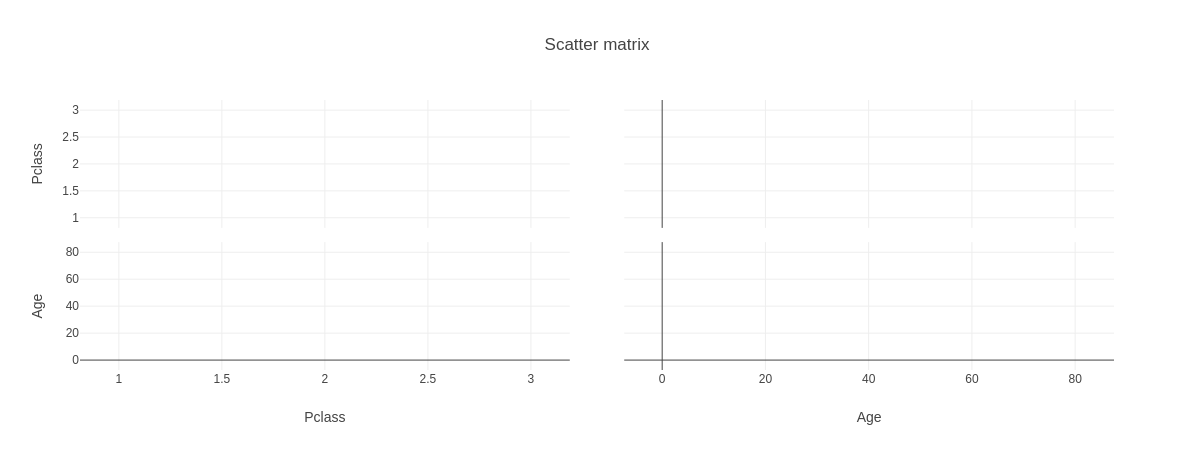

In [320]:
# your code here

fig = px.scatter_matrix(dft,dimensions=['Pclass','Age'],title="Scatter matrix",)
fig.show()

# sns.pairplot(dft[['Pclass','Age']],height=4)
# plt.tight_layout()
# plt.show()


#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

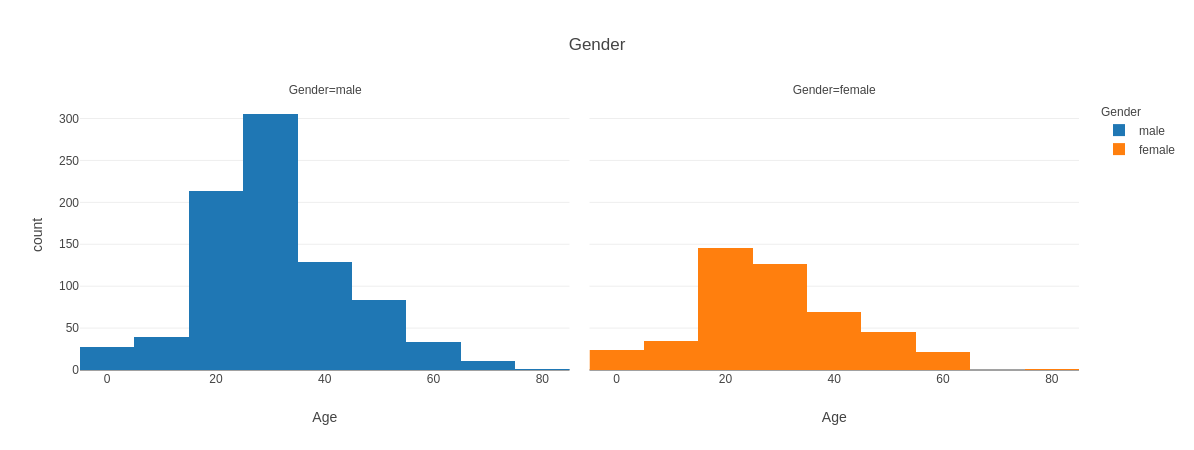

In [321]:
# your code here

px.histogram(dft, x='Age',color='Gender',orientation='v',title='Gender', facet_col='Gender', nbins=10)
